In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
files.upload()


Saving snow_terrain_mobility_raw.csv to snow_terrain_mobility_raw.csv


{'snow_terrain_mobility_raw.csv': b'time_s,wheel_speed_mps,linear_speed_mps,ax,ay,az,gx,gy,gz,temperature_c\n0.0,1.3490142459033698,1.1230303101665424,-0.1726987209929868,-0.22281627164661752,9.806697473628045,-0.006784947304872217,0.011748140575856918,-0.004484819110963726,-2.362078121873071\n0.05,1.1585207096486445,1.025925851388298,-0.006240697787816795,-0.126186166747558,9.759634973962442,-0.003054994630536529,-0.01878980944753827,-0.0042166943730916045,-4.882072403769604\n0.1,1.3943065614302077,1.1443882757613617,0.0036033744088893173,-0.188412036714849,9.792762504254634,-0.0059738106104514285,-0.003277950558774631,0.04470854869513922,-7.7369765421990735\n0.15,1.6569089569224076,1.4401916395455217,0.09452606916868113,-0.10959916374822756,9.88147317275177,0.0011041804694611956,-0.0004166002338133474,0.016186218078626018,-6.387497459599908\n0.2,1.1297539875829992,0.80284671673103,-0.2733716726561653,-0.04283006214223775,9.937785665503052,0.011971785314619128,0.00015908658399631082,0

In [3]:
df = pd.read_csv("snow_terrain_mobility_raw.csv")
df.head()


,time_s,wheel_speed_mps,linear_speed_mps,ax,ay,az,gx,gy,gz,temperature_c
0,0.00,1.349014,1.123030,-0.172699,-0.222816,9.806697,-0.006785,0.011748,-0.004485,-2.362078
1,0.05,1.158521,1.025926,-0.006241,-0.126186,9.759635,-0.003055,-0.018790,-0.004217,-4.882072
2,0.10,1.394307,1.144388,0.003603,-0.188412,9.792763,-0.005974,-0.003278,0.044709,-7.736977
3,0.15,1.656909,1.440192,0.094526,-0.109599,9.881473,0.001104,-0.000417,0.016186,-6.387497
4,0.20,1.129754,0.802847,-0.273372,-0.042830,9.937786,0.011972,0.000159,0.049613,-3.971440


## Exploratory Data Analysis (EDA)

This notebook analyzes sensor data from an autonomous snow-terrain vehicle.
The dataset includes IMU data, wheel encoder speed, vehicle speed, and temperature
measurements collected under low-traction conditions.


In [5]:
df["slip_ratio"] = (df["wheel_speed_mps"] - df["linear_speed_mps"]) / df["wheel_speed_mps"]
df["slip_ratio"] = df["slip_ratio"].fillna(0)

df[["wheel_speed_mps", "linear_speed_mps", "slip_ratio"]].head()


,wheel_speed_mps,linear_speed_mps,slip_ratio
0,1.349014,1.123030,0.167518
1,1.158521,1.025926,0.114452
2,1.394307,1.144388,0.179242
3,1.656909,1.440192,0.130796
4,1.129754,0.802847,0.289361


In [6]:
df.columns



Index(['time_s', 'wheel_speed_mps', 'linear_speed_mps', 'ax', 'ay', 'az', 'gx',
       'gy', 'gz', 'temperature_c', 'slip_ratio'],
      dtype='object')

In [8]:
average_slip = df["slip_ratio"].mean()
max_slip = df["slip_ratio"].max()

average_slip, max_slip


(np.float64(0.10071581545986481), 0.4019512155820826)

### Slip Ratio Results Interpretation

The average slip ratio is approximately 10%, which is below the 15% threshold,
indicating stable traction performance under snowy conditions. Occasional peaks
in slip ratio are observed, reaching higher values during transient events such
as acceleration or uneven terrain interaction. These brief events do not
significantly affect overall mobility stability.


In [9]:
dt = df["time_s"].diff().fillna(0)
dt.head()


,time_s
0,0.00
1,0.05
2,0.05
3,0.05
4,0.05


In [10]:
df["yaw_angle_rad"] = (df["gz"] * dt).cumsum()
df[["gz", "yaw_angle_rad"]].head()


,gz,yaw_angle_rad
0,-0.004485,-0.000000
1,-0.004217,-0.000211
2,0.044709,0.002025
3,0.016186,0.002834
4,0.049613,0.005315


In [11]:
df["yaw_angle_deg"] = np.degrees(df["yaw_angle_rad"])
df["yaw_angle_deg"].head()


,yaw_angle_deg
0,-0.000000
1,-0.012080
2,0.116001
3,0.162371
4,0.304502


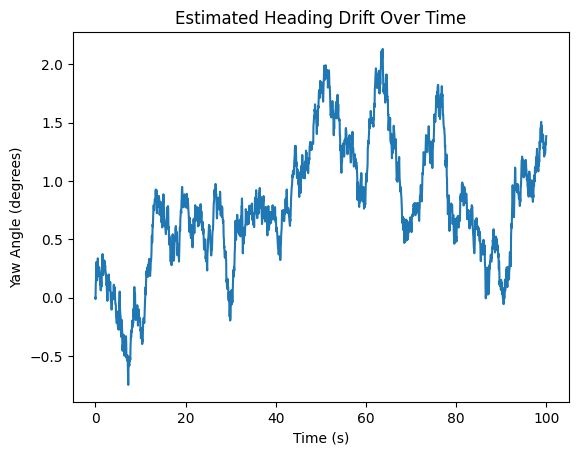

In [12]:
plt.figure()
plt.plot(df["time_s"], df["yaw_angle_deg"])
plt.xlabel("Time (s)")
plt.ylabel("Yaw Angle (degrees)")
plt.title("Estimated Heading Drift Over Time")
plt.show()


In [13]:
max_drift_deg = df["yaw_angle_deg"].abs().max()
max_drift_deg


2.132340483602737

In [14]:
max_drift_deg


2.132340483602737

### Directional Drift Results Interpretation

The maximum estimated heading drift is approximately 2.13 degrees, which is well
below the 5-degree threshold. This indicates that the vehicle maintains stable
directional control despite operating on low-friction snowy terrain.
